In [ ]:
# Preparing where we were at the end of the last notebook
%matplotlib inline
import matplotlib.pyplot as plt
from htrc_features import FeatureReader
fr = FeatureReader(['data/sample-file1.basic.json.bz2', 'data/sample-file2.basic.json.bz2'])
vol = fr.first()

# More Features in the HTRC Extracted Features Dataset

So far we have mainly used token-counting features, accessed through `Volume.tokenlist()`. The HTRC Extracted Features Dataset provides more features at the volume level. Here are other features that are available at the volume level; try them and see what the output is:

- `Volume.line_counts()`: How many vertically spaced lines of text, a measure related to the phyical format of the page.
- `Volume.sentence_counts()`: How many sentences of text: a measure related to the content on a page.
- `Volume.empty_line_counts()`: How many larger vertical spaces are there on the page between lines of text? This can be used as a proxy for paragraph count. This is based on what software was used to OCR so there are inconsistencies: not all scans in the HathiTrust are OCR'd identically.
- `Volume.begin_line_chars()`, `Volume.end_line_chars()`: The count of different characters along the left-most and right-most sides of a page. This can tell you about what kind of page it is: for example, a table of contents might have a lot of numbers or roman numerals at the end of each line

Earlier, we saw that the number of words on a page gave some indication of whether it was a page of the novel or a different kind of page. We can see that line count is another contextual 'hint' that could help a researcher focus only on the real content of a page:

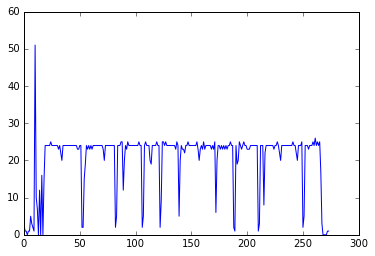

In [ ]:
line_counts = vol.line_counts()
plt.plot(line_counts)

## Page Level

If you open the raw dataset file for a HTRC EF volume on your computer, you may notice that features are provided for each page. While this workshop has focused on volumes, most of the features that we have seen can be accessed for a single page; e.g. `Page.tokenlist()` instead of `Volume.tokenlist()`. The methods to access the features are named the same, with the exception that `line_count`, `empty_line_count`, and `sentence_count` are not pluralized.

Like iterating over `FeatureReader.volumes()` to get Volume objects, it is possible to iterate across pages with `Volume.pages()`.

# Next Steps

Now that you know the basics of the HTRC Feature Reader, you can learn more about the Extracted Features dataset ([https://analytics.hathitrust.org/features](https://analytics.hathitrust.org/features)). The Feature Reader home page ([https://github.com/htrc/htrc-feature-reader/](https://github.com/htrc/htrc-feature-reader/blob/master/README.ipynb)) contains a lesson similar to this one but for more advanced users (that's you now!), and the code documentation ([http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html](http://htrc.github.io/htrc-feature-reader/htrc_features/feature_reader.m.html)) gives exact information about what types of information can be called.

Underwood (2015) has released a custom subset of the HTRC EF Dataset ([https://analytics.hathitrust.org/genre](https://analytics.hathitrust.org/genre)), comprised of volumes classified by genre: fiction, poetry, and drama. Fiction is a good place to tinker with text mining ideas because of its expressiveness.

To end this workshop, we are including a self-guided advanced tutorial showing how to derive 'plot arcs' for a text based on sentiment, a process popularized by Jockers (2015).

![Plot Arc Example](images/plot-arc.png)

# References

Boris Capitanu, Ted Underwood, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Extracted Feature Dataset from 4.8 Million HathiTrust Digital Library Public Domain Volumes" (0.2)[Dataset]. *HathiTrust Research Center*, doi:10.13012/j8td9v7m.

Matthew L. Jockers (Feb 2015). "Revealing Sentiment and Plot Arcs with the Syuzhet Package". *Matthew L. Jockers*. Blog. http://www.matthewjockers.net/2015/02/02/syuzhet/.

Ted Underwood, Boris Capitanu, Peter Organisciak, Sayan Bhattacharyya, Loretta Auvil, Colleen Fallaw, J. Stephen Downie (2015). "Word Frequencies in English-Language Literature, 1700-1922" (0.2) [Dataset]. *HathiTrust Research Center*. doi:10.13012/J8JW8BSJ.

Hadley Wickham (2011). "The split-apply-combine strategy for data analysis". *Journal of Statistical Software*, 40(1), 1-29.

# Appendix: Downloading custom files via rsync

The HTRC Extracted Features (EF) dataset is accessible using *rsync*, a Unix command line program for syncing files. It is already preinstalled on Linux or Mac OS. Windows users need to use *rsync* by downloading a program such as [https://cygwin.com/](Cygwin), which provides a Unix-like command line environment in Windows.

To download all *1.3 TB* comprising the EF dataset, you can use this command (be aware the full transfer will take a very long time):

```bash
rsync -rv data.sharc.hathitrust.org::pd-features/basic/ .
```

 This recurses (the `-r` flag) through all the folders on the HTRC server, and syncs all the files to a location on your system in this case a `.` meaning "the current folder"). The `-v` flag means `--verbose`, which simply gives you more information.
 You can also sync individual files by inputing a full file path. A list of all file paths is available: 

```bash
rsync -azv data.sharc.hathitrust.org::pd-features/listing/pd-basic-file-listing.txt .
```

 It is also possible to sync a subset of files defined in a text file. The Feature Reader Library [has a document describing steps to compile such a list](https://github.com/htrc/htrc-feature-reader/blob/master/examples/ID_to_Rsync_Link.ipynb).